In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append(str("/content/drive/MyDrive/Colab Notebooks"))

In [ ]:
!pip install fitter

In [4]:
import pandas as pd
import numpy as np
import MLtemplate as ml
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
import pymc3 as pm
from fitter import Fitter, get_common_distributions, get_distributions


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
bikedf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv")

In [6]:
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


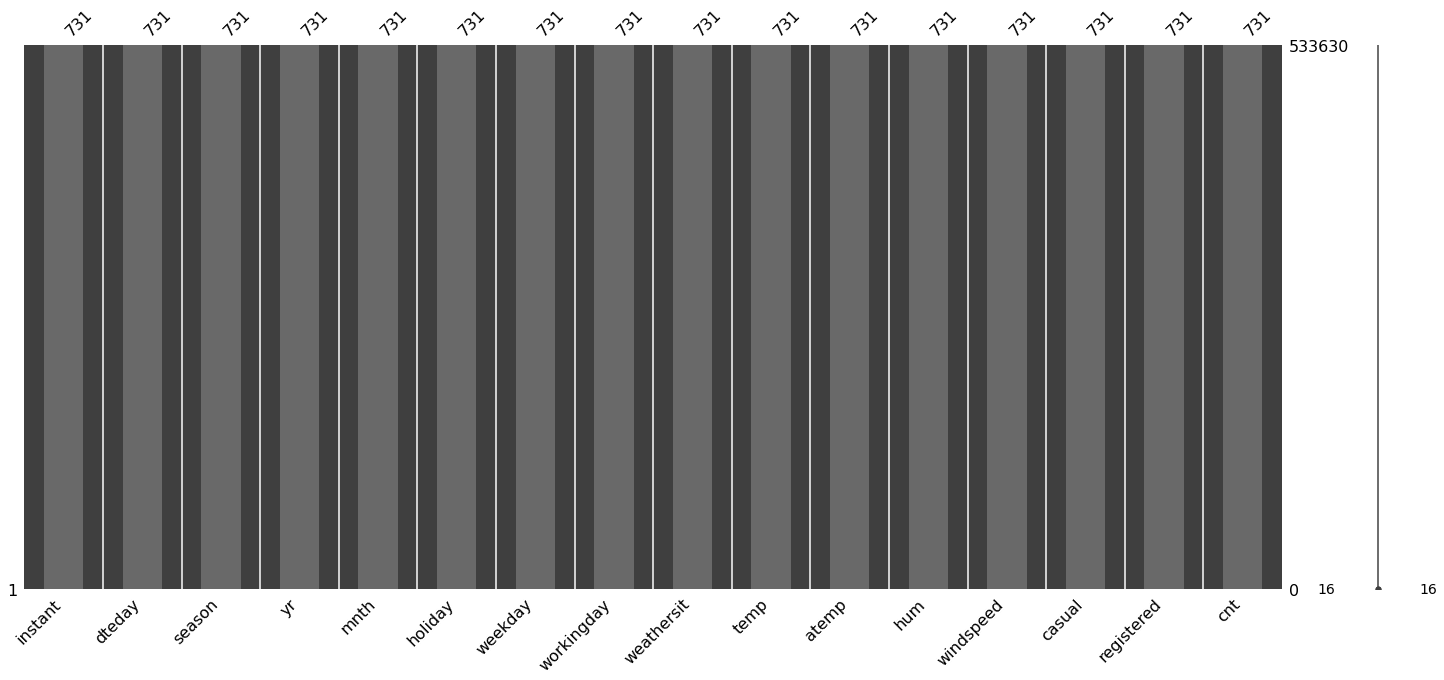

In [8]:
ml.analyze_missing(bikedf)

In [9]:
bikedf.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [10]:
bikedf = ml.drop_columns(bikedf, ["instant","dteday"])

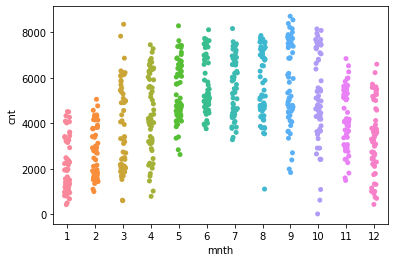

In [11]:
sns.stripplot(x="mnth", y="cnt", data=bikedf, jitter=True)
plt.show();

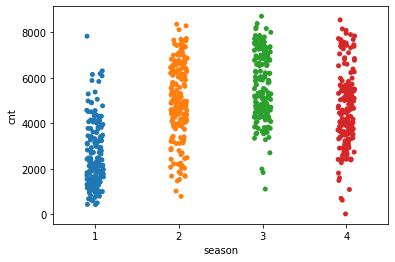

In [12]:
sns.stripplot(x="season", y="cnt", data=bikedf, jitter=True)
plt.show();

In [13]:
pd.crosstab(index=bikedf["season"], columns=bikedf["mnth"])

mnth,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,62,57,40,0,0,0,0,0,0,0,0,22
2,0,0,22,60,62,40,0,0,0,0,0,0
3,0,0,0,0,0,20,62,62,44,0,0,0
4,0,0,0,0,0,0,0,0,16,62,60,40


In [88]:
bikedf["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

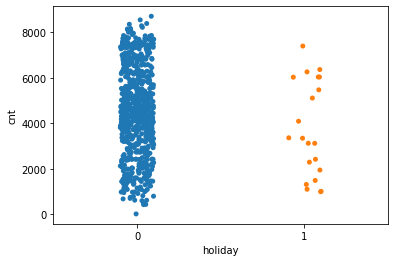

In [14]:
sns.stripplot(x="holiday", y="cnt", data=bikedf, jitter=True)
plt.show();

In [15]:
bikedf["holiday"].value_counts()

0    710
1     21
Name: holiday, dtype: int64

from the above we see that one class is completely dominant on the other and therefore 

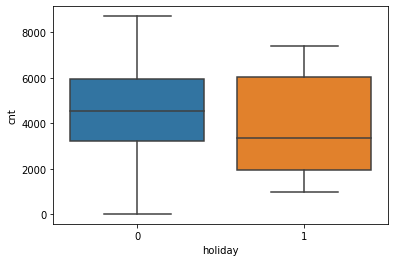

In [16]:
sns.boxplot(x=bikedf["holiday"],y=bikedf["cnt"])

There is a big difference. on Holiday, bikers seem to be more

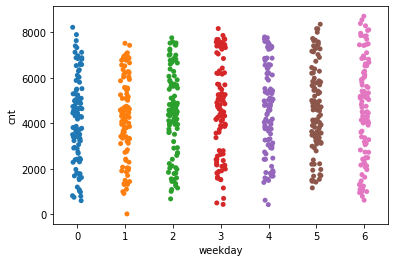

In [17]:
sns.stripplot(x="weekday", y="cnt", data=bikedf, jitter=True)
plt.show();

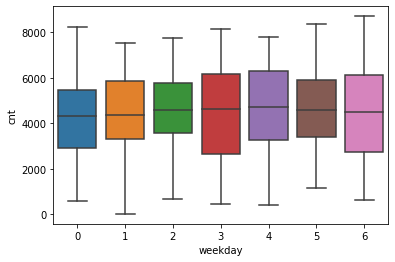

In [18]:
sns.boxplot(x=bikedf["weekday"],y=bikedf["cnt"])

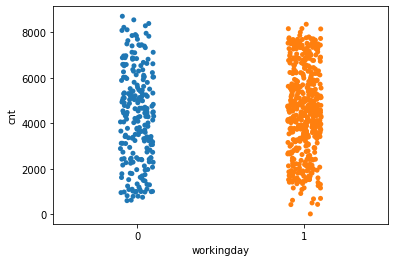

In [19]:
sns.stripplot(x="workingday", y="cnt", data=bikedf, jitter=True)
plt.show();

In [20]:
bikedf["workingday"].value_counts()

1    500
0    231
Name: workingday, dtype: int64

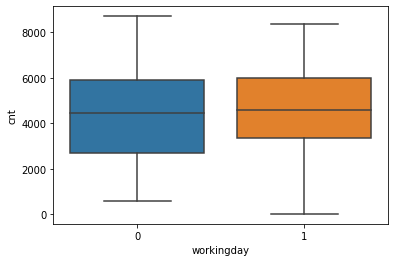

In [21]:
sns.boxplot(x=bikedf["workingday"],y=bikedf["cnt"])

In [22]:
bikedf[bikedf["workingday"] == 1]["cnt"].describe()

count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: cnt, dtype: float64

In [23]:
bikedf[bikedf["workingday"] == 0]["cnt"].describe()

count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: cnt, dtype: float64

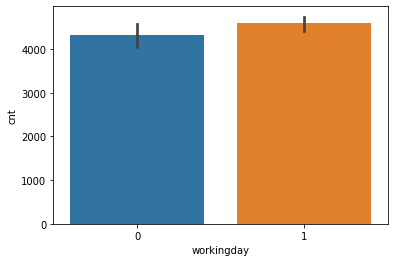

In [24]:
sns.barplot(x="workingday", y="cnt", data=bikedf,)

In [25]:
bikedf["weathersit"].unique()

array([2, 1, 3])

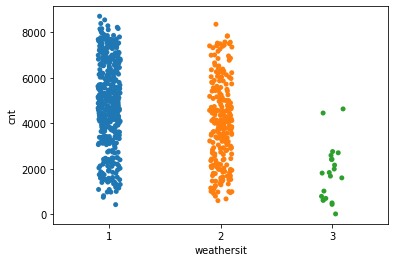

In [26]:
sns.stripplot(x="weathersit", y="cnt", data=bikedf, jitter=True)
plt.show();

from above it seems bikers are more when the weather is clear or partly cloudly. 2 represent cloudy and mist but even in this case bikers are more. In 3 which represents heavy rain and fog we see very less bikers

In [74]:
bikedf["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

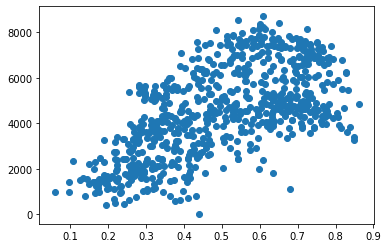

In [27]:
plt.scatter(bikedf["temp"], bikedf["cnt"])

here we notice that as temp increases so does biker counts which means that people like to nike in summer temperatures

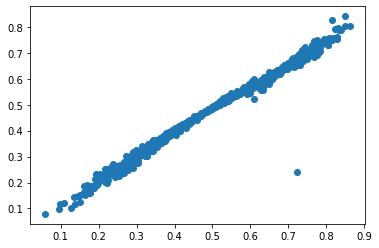

In [28]:
plt.scatter(bikedf["temp"], bikedf["atemp"])

In [29]:
bikedf[["temp", "atemp"]].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


This correlation is huge so we will drop atemp data

In [30]:
columns_to_drop = ["atemp"]

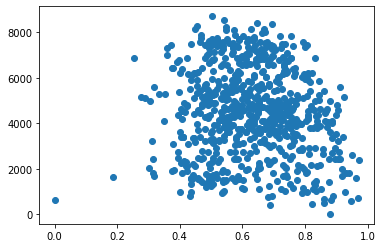

In [31]:
plt.scatter(bikedf["hum"], bikedf["cnt"])

In [32]:
bikedf[["hum", "cnt"]].corr()

,hum,cnt
hum,1.000000,-0.100659
cnt,-0.100659,1.000000


,hum,temp
hum,1.000000,0.126963
temp,0.126963,1.000000


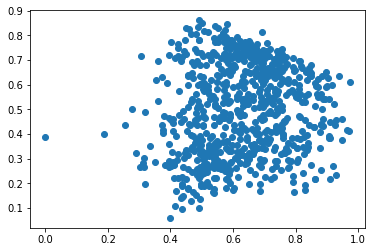

In [33]:
plt.scatter(bikedf["hum"], bikedf["temp"])
bikedf[["hum", "temp"]].corr()

we will exclude humidity because there is no trend visbible in the plots above

In [34]:
columns_to_drop.append("hum")

In [35]:
columns_to_drop.append("yr")

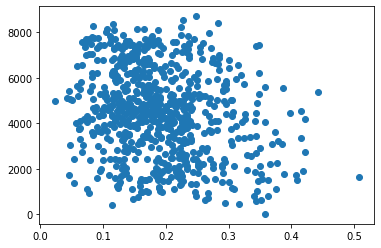

In [36]:
plt.scatter(bikedf["windspeed"], bikedf["cnt"])

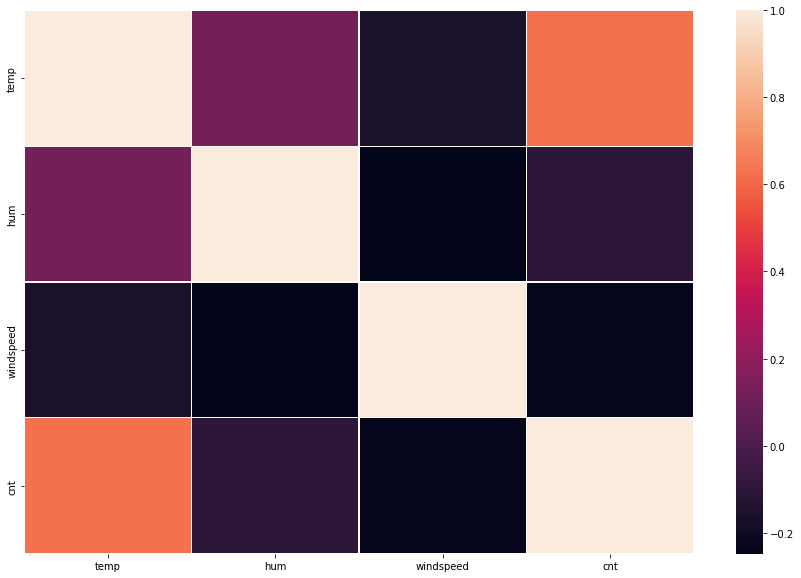

In [37]:
ml.corr_heatmap(bikedf[["temp", "hum", "windspeed", "cnt"]])

from the above we see that temperature has the highest correlation with cnt, therefore this is an important variable to take in our model

In [38]:
columns_to_drop.append("windspeed")

In [39]:
columns_to_drop.append("casual")
columns_to_drop.append("registered")

In [40]:
columns_to_drop

['atemp', 'hum', 'yr', 'windspeed', 'casual', 'registered']

We will drop above variables. Windspeed and hum already have very less correlation with cnt

In [41]:
newbikedf = ml.drop_columns(bikedf,columns_to_drop)

In [42]:
newbikedf

,season,mnth,holiday,weekday,workingday,weathersit,temp,cnt
0,1,1,0,6,0,2,0.344167,985
1,1,1,0,0,0,2,0.363478,801
2,1,1,0,1,1,1,0.196364,1349
3,1,1,0,2,1,1,0.200000,1562
4,1,1,0,3,1,1,0.226957,1600
...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,2114
727,1,12,0,5,1,2,0.253333,3095
728,1,12,0,6,0,2,0.253333,1341
729,1,12,0,0,0,1,0.255833,1796


In [43]:
y = newbikedf["cnt"]
X = newbikedf.drop("cnt", axis=1)

In [44]:
X = pd.get_dummies(X, columns=["season", "mnth", "weekday", "weathersit"], drop_first=True)

In [45]:
X

,holiday,workingday,temp,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0.344167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0.363478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0.226957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,0.254167,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
727,0,1,0.253333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
728,0,0,0.253333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
729,0,0,0.255833,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Classical Regression

we will run linear regression with just temperature to see the result



In [46]:
trainx, testx, trainy, testy = ml.train_test(newbikedf,X[["temp"]],y,standard_scaling=True)

In [47]:
trainx.shape

(584, 1)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def do_ml_linar_reg(df,X,y):
    trainx, testx, trainy, testy = ml.train_test(df,X,y,standard_scaling=True)
    regr = LinearRegression()
    regr.fit(trainx, trainy)
    y_pred = regr.predict(testx)
    print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))
    return y_pred, regr

In [49]:
y_pred1, regr1 = do_ml_linar_reg(newbikedf, X[["temp"]],y)

Mean Absolute Error: 1297.5857587730013
Mean Squared Error: 2414669.707133888
Root Mean Squared Error: 1553.9207531704724


In [50]:
regr1.coef_

array([1193.33619449])

adding more variables

In [51]:
y_pred2, regr2 = do_ml_linar_reg(newbikedf, X[["temp", "weathersit_2", "weathersit_3"]],y)

Mean Absolute Error: 1191.3754693779974
Mean Squared Error: 2002593.056918887
Root Mean Squared Error: 1415.1300494720924


In [84]:
y_pred4, regr4 = do_ml_linar_reg(newbikedf, X[["temp","season_4", "weathersit_3",]],y)

Mean Absolute Error: 1157.462682772099
Mean Squared Error: 1843663.5967441131
Root Mean Squared Error: 1357.8157447695594


# MCMC

(array([  7.,  36.,  90., 104.,  93.,  80.,  93., 101., 103.,  24.]),
 array([0.0591304 , 0.13938406, 0.21963772, 0.29989138, 0.38014504,
        0.4603987 , 0.54065236, 0.62090602, 0.70115968, 0.78141334,
        0.861667  ]),
 <a list of 10 Patch objects>)

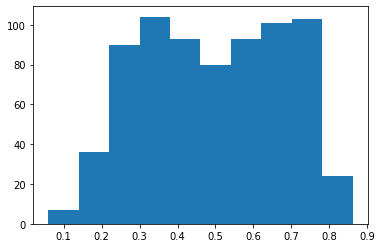

In [53]:
plt.hist(newbikedf["temp"])

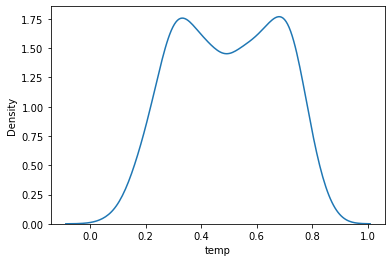

In [54]:
sns.kdeplot(X["temp"])

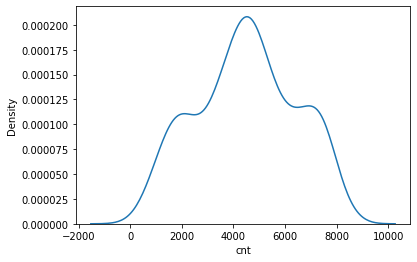

In [55]:
sns.kdeplot(newbikedf["cnt"])

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

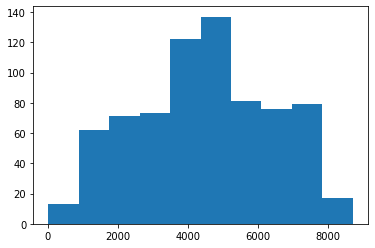

In [72]:
plt.hist(newbikedf["cnt"])

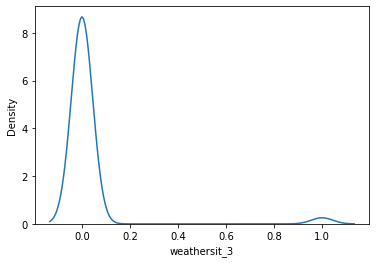

In [56]:
sns.kdeplot(X["weathersit_3"])

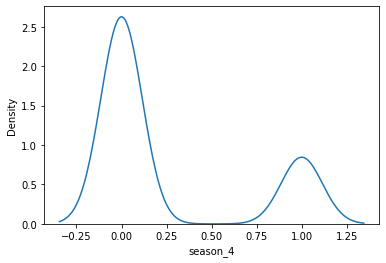

In [57]:
sns.kdeplot(X["season_4"])

In [58]:
np.linspace(0,100, 11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [59]:
import scipy.stats

In [60]:
dist = getattr(scipy.stats, 'beta')
param_ = dist.fit(X["season_4"])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [61]:
param_

(1.073094329093447e-12,
 8.727467071973581e-13,
 -9.546720875175675e-30,
 1.0000000000000075)

In [62]:
r = scipy.stats.beta.rvs(param_[0], param_[1], size=731)

In [63]:
r.shape

(731,)

In [64]:
trainx, testx, trainy, testy = ml.train_test(newbikedf,X[["temp", "weathersit_3", "season_4"]],y,standard_scaling=True)

In [132]:
lower = 0
higher = 5000
with pm.Model() as linear_reg_model:
    #priors on parameters
    # beta_0=pm.Uniform('beta_0', lower=lower, upper= higher)
    beta_0=pm.Normal('beta_0', 0,  100)
    # temp=pm.Normal("temp", mu=0.5, sigma= 2)
    temp=pm.Normal("temp", 0.5, )
    # weathersit3=pm.Normal('weathersit3',1, 2)
    weathersit3=pm.Bernoulli('weathersit3',0.06)
    # season4=pm.Normal('season4', 1, 10)
    season4=pm.Bernoulli('season4', 0.20,)

    error = pm.Normal("error", mu = 500, sd = 100)

    # cnt_obs=pm.Normal("cnt_obs", mu=temp*trainx[:,0] + weathersit3*trainx[:,1] + season4*trainx[:,2], sd=beta_0, observed=trainy)

    cnt_obs=pm.Normal("cnt_obs", mu=beta_0 + temp*trainx[:,0] + weathersit3*trainx[:,1]+ season4*trainx[:,2] , sd=error, observed=trainy)
  
    step=pm.NUTS()
    #samples from posterior distribution 
    trace=pm.sample(3000,tune=3000 ,step=step,start={'beta_0': np.array(0.), 'temp': np.array(0.), 'weathersit3': np.array(0), 'season4': np.array(0), 'error': np.array(0.)} )

SamplingError: ignored

In [ ]:
with linear_reg_model:
    az.plot_trace(trace)

In [ ]:

az.summary(trace, var_names=['beta_0', 'temp', 'weathersit3', 'season4'])

In [96]:
regr4.coef_

array([1258.97105437,  428.8151021 , -448.07646698])

In [97]:
regr4.intercept_

4533.630136986301

In [ ]:
with linear_reg_model:
    y_pred = pm.sample_posterior_predictive(trace, var_names=["beta_0", "temp", "weathersit3", "season4", "cnt_obs"])

In [ ]:
az.plot_ppc(az.from_pymc3(posterior_predictive=y_pred, model=linear_reg_model))